In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.cluster import MeanShift, AgglomerativeClustering, KMeans
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.decomposition import PCA
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
X_train, X_test, y_train, y_test = pd.read_csv("X_train.csv"), pd.read_csv("X_test.csv"), \
                                   pd.read_csv("y_train.csv", header=None, names=['loan_status']), \
                                   pd.read_csv("y_test.csv", header=None, names=['loan_status'])

In [3]:
X_train.head()

,acc_open_past_24mths,annual_inc,avg_cur_bal,bc_open_to_buy,bc_util,delinq_2yrs,delinq_amnt,dti,earliest_cr_line,emp_length,...,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim,verification_status,mo_sin_old_rev_tol_op
0,3.0,52000.0,6308.0,3569.0,52.4,0.0,0.0,2.54,1997,6,...,0.0,31540.0,42325.0,10.0,4494.0,7500.0,0.0,8200.0,0,92.0
1,4.0,118527.0,7511.0,4261.0,61.6,1.0,0.0,4.38,1991,1,...,0.0,81689.0,112459.0,35.0,36785.0,14500.0,30861.0,23450.0,2,164.0
2,11.0,40000.0,9156.0,16335.0,39.5,0.0,0.0,22.14,2000,3,...,0.0,146493.0,170778.0,25.0,34464.0,27000.0,23244.0,32000.0,2,158.0
3,5.0,70000.0,10706.0,1100.0,75.0,1.0,0.0,25.54,1982,9,...,0.0,128473.0,136573.0,41.0,129265.0,3300.0,121773.0,14800.0,0,376.0
4,5.0,42000.0,8692.0,488.0,39.0,0.0,0.0,21.66,1996,-1,...,70.0,78226.0,100553.0,23.0,20781.0,800.0,24103.0,14200.0,2,208.0


In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((593835, 55), (197946, 55), (593835, 1), (197946, 1))

In [8]:
y_train['loan_status'].value_counts(normalize=True)

0    0.796499
1    0.203501
Name: loan_status, dtype: float64

In [9]:
X_train.isnull().any().sum(), X_test.isnull().any().sum()

(0, 0)

Create set of undersampled data and save to csv.

In [ ]:
rus = RandomUnderSampler(random_state=0)
X_undersampled, y_undersampled = rus.fit_sample(X_train, y_train.as_matrix().ravel())

In [ ]:
X_train_undersampled = pd.DataFrame(data=X_undersampled, columns=X_train.columns)
y_train_undersampled_df = pd.DataFrame(data=y_undersampled, columns=['loan_status'])

In [ ]:
X_train_undersampled.to_csv('X_train_undersampled.csv', index=False)
y_train_undersampled_df.to_csv('y_train_undersampled.csv', index=False)

In [7]:
X_train_undersampled = pd.read_csv("X_train_undersampled.csv")
y_train_undersampled = pd.read_csv("y_train_undersampled.csv").as_matrix().ravel()

In [15]:
inds = np.arange(len(X_train_undersampled))
np.random.shuffle(inds)
X_train_undersampled = X_train_undersampled.iloc[inds]
y_train_undersampled = y_train_undersampled[inds]

In [16]:
y_train_undersampled

array([1, 0, 0, ..., 0, 1, 0])

In [9]:
Counter(y_train_undersampled)

Counter({0: 120668, 1: 120668})

Create set of oversampled data and save to csv.

In [ ]:
ros = RandomOverSampler(random_state=0)
X_oversampled, y_oversampled = ros.fit_sample(X_train, y_train.as_matrix().ravel())

In [ ]:
X_oversampled.shape

In [ ]:
Counter(y_oversampled)

In [ ]:
Counter(y_train.as_matrix().ravel())

In [ ]:
Counter(y_test.as_matrix().ravel())

In [ ]:
X_train_oversampled = pd.DataFrame(data=X_oversampled, columns=X_train.columns)
y_train_oversampled_df = pd.DataFrame(data=y_oversampled, columns=['loan_status'])

In [ ]:
X_train_oversampled.to_csv("X_train_oversampled.csv", index=False)
y_train_oversampled_df.to_csv("y_train_oversampled.csv", index=False)

# Scaling the data and Undersampling

In [3]:
scaler = StandardScaler()
scaler.fit(X_train)
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# X_train_over_scaled = scaler.fit_transform(X_train_oversampled)
# X_test_over_scaled = scaler.transform(X_test)
# X_train_over_scaled = pd.DataFrame(data=X_train_over_scaled, columns=X_train.columns)
# X_test_over_scaled = pd.DataFrame(data=X_test_over_scaled, columns=X_train.columns)
# X_train_over_scaled.to_csv("X_train_over_scaled.csv", index=False)
# X_test_over_scaled.to_csv("X_test_over_scaled.csv", index=False)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
# X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
# X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=X_test.columns)
# X_train_scaled.to_csv("X_train_scaled.csv", index=False)
# X_test_scaled.to_csv("X_test_scaled.csv", index=False)
X_train_scaled = pd.read_csv("X_train_scaled.csv")
X_test_scaled = pd.read_csv("X_test_scaled.csv")

In [ ]:
scaler = StandardScaler()
X_train_under_scaled = scaler.fit_transform(X_train_undersampled)
X_test_under_scaled = scaler.transform(X_test)
X_train_under_scaled = pd.DataFrame(data=X_train_under_scaled, columns=X_train.columns)
X_test_under_scaled = pd.DataFrame(data=X_test_under_scaled, columns=X_train.columns)
X_train_under_scaled.to_csv("X_train_under_scaled.csv", index=False)
X_test_under_scaled.to_csv("X_test_under_scaled.csv", index=False)

In [5]:
y_train_arr = y_train.as_matrix().ravel()
y_test_arr = y_test.as_matrix().ravel()

# Trees

### Decision Tree

In [16]:
DT = tree.DecisionTreeClassifier()
DT.fit(X_train_scaled, y_train_arr)
y_pred = DT.predict(X_test_scaled)

In [17]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.701640851545
precision: [ 0.80218765  0.30421837]
recall: [ 0.82004957  0.2801032 ]
F1: [ 0.81102027  0.29166317]
support: [ 0.78070282  0.21929718]


array([[ 0.64021501,  0.15787134],
       [ 0.14048781,  0.06142584]])

### Random Forest

In [6]:
RF = RandomForestClassifier()
RF.fit(X_train_scaled, y_train_arr)
y_pred = RF.predict(X_test_scaled)

In [7]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.78996291918
precision: [ 0.9662991   0.09297438]
recall: [ 0.80809503  0.41106195]
F1: [ 0.88014437  0.15164871]
support: [ 0.95433098  0.04566902]


array([[ 0.77119012,  0.02689622],
       [ 0.18314086,  0.0187728 ]])

### Gradient Boosting Classifier

In [21]:
GB = GradientBoostingClassifier()
GB.fit(X_train_scaled, y_train_arr)
y_pred = GB.predict(X_test_scaled)

In [22]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.801890414558
precision: [ 0.98847941  0.0643765 ]
recall: [ 0.8067971   0.58570453]
F1: [ 0.88844512  0.1160028 ]
support: [ 0.97780708  0.02219292]


array([[ 0.78889192,  0.00919443],
       [ 0.18891516,  0.01299849]])

### AdaBoost

In [24]:
AB = AdaBoostClassifier()
AB.fit(X_train_scaled, y_train_arr)
y_pred = AB.predict(X_test_scaled)

In [25]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.800278863933
precision: [ 0.98464976  0.07153223]
recall: [ 0.80738807  0.54106737]
F1: [ 0.88725188  0.12635906]
support: [ 0.97330585  0.02669415]


array([[ 0.78583553,  0.01225082],
       [ 0.18747032,  0.01444333]])

### Bagging Classifier

In [27]:
BC = BaggingClassifier()
BC.fit(X_train_scaled, y_train_arr)
y_pred = BC.predict(X_test_scaled)

In [28]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.789781051398
precision: [ 0.95908291  0.12059648]
recall: [ 0.81170244  0.42715349]
F1: [ 0.87925952  0.18809022]
support: [ 0.94299455  0.05700545]


array([[ 0.76543098,  0.03265537],
       [ 0.17756358,  0.02435008]])

### Extra Trees

In [30]:
ET = ExtraTreesClassifier()
ET.fit(X_train_scaled, y_train_arr)
y_pred = ET.predict(X_test_scaled)

In [31]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.79097834763
precision: [ 0.96933117  0.08601882]
recall: [ 0.80739522  0.415067  ]
F1: [ 0.88098354  0.14250482]
support: [ 0.95815525  0.04184475]


array([[ 0.77360997,  0.02447637],
       [ 0.18454528,  0.01736837]])

# Neighbors

### K Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train_arr)
y_pred = knn.predict(X_test_scaled)

In [36]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.445659147743
precision: [ 0.44340657  0.44623223]
recall: [ 0.16923516  0.75910953]
F1: [ 0.24497182  0.56206323]
support: [ 0.53138498  0.46861502]


array([[ 0.08992902,  0.11288489],
       [ 0.44145596,  0.35573013]])

### Nearest Centroid

In [6]:
NC = NearestCentroid()
NC.fit(X_train_scaled, y_train_arr)
y_pred = NC.predict(X_test_scaled)

In [7]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.633278772999
precision: [ 0.62875843  0.65114592]
recall: [ 0.876908   0.3073589]
F1: [ 0.7323844   0.41759935]
support: [ 0.57224192  0.42775808]


array([[ 0.50180352,  0.29628282],
       [ 0.0704384 ,  0.13147525]])

# Naive Bayes

### Gaussian Naive Bayes

In [8]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train_arr)
y_pred = nb.predict(X_test_scaled)

In [9]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.525936366484
precision: [ 0.46486853  0.76731385]
recall: [ 0.88759835  0.2661991 ]
F1: [ 0.61016879  0.39526986]
support: [ 0.41798773  0.58201227]


array([[ 0.37100522,  0.42708112],
       [ 0.04698251,  0.15493114]])

### Bernoulli Naive Bayes

In [10]:
BNB = BernoulliNB()
BNB.fit(X_train_scaled, y_train_arr)
y_pred = BNB.predict(X_test_scaled)

In [11]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.732032978691
precision: [ 0.81988631  0.38478283]
recall: [ 0.84044824  0.35085438]
F1: [ 0.83003996  0.36703619]
support: [ 0.77856082  0.22143918]


array([[ 0.65434007,  0.14374627],
       [ 0.12422075,  0.07769291]])

# Linear Models

### Logistic Regression

In [14]:
logit = LogisticRegression()
logit.fit(X_train_scaled, y_train_arr)
y_pred = logit.predict(X_test_scaled)

In [15]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.800536509957
precision: [ 0.98613098  0.06695356]
recall: [ 0.80685626  0.54982535]
F1: [ 0.88753108  0.11937103]
support: [ 0.97541249  0.02458751]


array([[ 0.78701767,  0.01106868],
       [ 0.18839481,  0.01351884]])

In [ ]:
np.std(X, 0)*m.coef_

In [26]:
logit.coef_.shape

(1, 55)

In [27]:
X_train.std().shape

(55,)

In [30]:
logit_coefs = np.abs(X_train.std()*logit.coef_.reshape(55)).argsort()[::-1]

In [31]:
X_train.columns[logit_coefs]

Index(['tot_hi_cred_lim', 'tot_cur_bal', 'total_bal_ex_mort',
       'total_il_high_credit_limit', 'loan_amnt', 'annual_inc',
       'total_bc_limit', 'revol_bal', 'total_rev_hi_lim', 'avg_cur_bal',
       'installment', 'bc_open_to_buy', 'delinq_amnt', 'grade',
       'percent_bc_gt_75', 'total_acc', 'mo_sin_old_rev_tol_op',
       'mo_sin_old_rev_tl_op', 'dti', 'mths_since_recent_bc', 'bc_util',
       'open_acc', 'num_sats', 'mths_since_last_delinq', 'num_il_tl',
       'acc_open_past_24mths', 'earliest_cr_line', 'tot_coll_amt',
       'mo_sin_rcnt_tl', 'num_rev_tl_bal_gt_0', 'mths_since_recent_inq',
       'mo_sin_rcnt_rev_tl_op', 'num_bc_tl', 'num_rev_accts', 'mort_acc',
       'purpose', 'emp_length', 'num_actv_rev_tl', 'mo_sin_old_il_acct',
       'delinq_2yrs', 'num_bc_sats', 'num_actv_bc_tl', 'home_ownership',
       'inq_last_6mths', 'num_accts_ever_120_pd', 'verification_status',
       'num_op_rev_tl', 'mths_since_recent_revol_delinq',
       'initial_list_status', 'pct_tl_

### SGD

In [14]:
sgd = SGDClassifier(max_iter=1000)
sgd.fit(X_train_scaled, y_train_arr)
y_pred = sgd.predict(X_test_scaled)

In [15]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.798086346781
precision: [ 1.  0.]
recall: [ 0.79808635  0.        ]
F1: [ 0.88770636  0.        ]
support: [ 1.  0.]


/Users/mmorley/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


array([[ 0.79808635,  0.        ],
       [ 0.20191365,  0.        ]])

### Perceptron

In [17]:
perceptron = Perceptron(max_iter=1000)
perceptron.fit(X_train_scaled, y_train_arr)
y_pred = perceptron.predict(X_test_scaled)

In [18]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.700968951128
precision: [ 0.82533011  0.20941753]
recall: [ 0.80492894  0.23273273]
F1: [ 0.81500188  0.22046041]
support: [ 0.81831409  0.18168591]


array([[ 0.65868469,  0.13940165],
       [ 0.15962939,  0.04228426]])

### Passive Aggressive Classifier

In [19]:
PAC = PassiveAggressiveClassifier(max_iter=1000)
PAC.fit(X_train_scaled, y_train_arr)
y_pred = PAC.predict(X_test_scaled)

In [20]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.66079637881
precision: [ 0.71208649  0.45806645]
recall: [ 0.83854376  0.28699523]
F1: [ 0.7701587   0.35289129]
support: [ 0.67773029  0.32226971]


array([[ 0.56830651,  0.22977984],
       [ 0.10942378,  0.09248987]])

# SVM

In [21]:
svm = SVC(max_iter=1000)
svm.fit(X_train_scaled, y_train_arr)
y_pred = svm.predict(X_test_scaled)

/Users/mmorley/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [22]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.557980459317
precision: [ 0.58214435  0.46246998]
recall: [ 0.81063023  0.21875592]
F1: [ 0.67764564  0.29701761]
support: [ 0.57313611  0.42686389]


array([[ 0.46460146,  0.33348489],
       [ 0.10853465,  0.093379  ]])

# Neural Network

In [23]:
mlp = MLPClassifier()
mlp.fit(X_train_scaled, y_train_arr)
y_pred = mlp.predict(X_test_scaled)

In [24]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.803709092379
precision: [ 0.96657762  0.15995296]
recall: [ 0.8197538   0.54767412]
F1: [ 0.88713177  0.24759397]
support: [ 0.94102937  0.05897063]


array([[ 0.77141241,  0.02667394],
       [ 0.16961697,  0.03229669]])

# Clustering

`AffinityPropagation()
DBSCAN()
Birch(n_clusters=2)
MeanShift()
SpectralClustering(n_clusters=2)
AgglomerativeClustering()
MiniBatchKMeans(n_clusters=2)
KMeans(n_clusters=2)`

Note that `AgglomerativeClustering` runs out of memory, as it requires an $O(n^2)$ matrix

In [ ]:
"""# kmeans = MeanShift(bin_seeding=True).fit(X_train_undersampled)
kmeans = MeanShift(bin_seeding=True, min_bin_freq=50).fit(X_train_undersampled)
y_pred = kmeans.labels_
print(np.unique(y_pred))"""

In [23]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train_scaled)
kmeans.labels_

array([0, 0, 1, ..., 1, 0, 0], dtype=int32)

In [24]:
print(accuracy_score(kmeans.labels_, y_train))

0.619951670077


In [25]:
pr, re, f1, support = precision_recall_fscore_support(kmeans.labels_, y_train)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_train)))
confusion_matrix(kmeans.labels_, y_train)/len(y_train)

precision: [ 0.6982044   0.31367195]
recall: [ 0.7992657   0.20982884]
F1: [ 0.74532484  0.25145109]
support: [ 0.69578755  0.30421245]


array([[ 0.55611912,  0.13966843],
       [ 0.2403799 ,  0.06383255]])

# Optimizing Methods

### Gradient Boosting Classifier

In [ ]:
param_dict = {'n_estimators':[10, 50, 100, 150], 'max_depth':[3,5,15], 'learning_rate':[.01,.1,.5]}
gb_grid = GridSearchCV(GradientBoostingClassifier(), param_dict, scoring='recall')
gb_grid.fit(X_train_scaled, y_train_arr)
gb_grid.best_estimator_, gb_grid.best_score_

In [ ]:
y_pred = gb_grid.predict(X_test_scaled)

In [ ]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

### Random Forest

In [5]:
param_dict = {'n_estimators':[5, 10, 50, 100, 150, 200], 'max_depth':[5,15,30], 
              'class_weight':[{0:1, 1:5}, {0:1,1:1}, {0:.2, 1:.8}]}
gridsearch = GridSearchCV(RandomForestClassifier(n_jobs=8), param_dict, scoring='recall')
gridsearch.fit(X_train_scaled, y_train_arr)
gridsearch.best_estimator_, gridsearch.best_score_

(RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 5},
             criterion='gini', max_depth=5, max_features='auto',
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_jobs=8, oob_score=False, random_state=None,
             verbose=0, warm_start=False), 0.8060920510401669)

In [6]:
y_pred = gridsearch.predict(X_test_scaled)

In [7]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.534251765633
precision: [ 0.46677385  0.80096577]
recall: [ 0.90262562  0.27537828]
F1: [ 0.6153384   0.40984771]
support: [ 0.41271357  0.58728643]


array([[ 0.37252584,  0.42556051],
       [ 0.04018773,  0.16172593]])

In [8]:
np.round(gridsearch.best_estimator_.feature_importances_, 2)

array([ 0.03,  0.01,  0.02,  0.03,  0.01,  0.  ,  0.  ,  0.05,  0.  ,
        0.  ,  0.36,  0.01,  0.  ,  0.  ,  0.01,  0.28,  0.02,  0.  ,
        0.  ,  0.  ,  0.  ,  0.01,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.01,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.01,  0.  ,
        0.01,  0.  ,  0.  ,  0.01,  0.  ,  0.  ,  0.  ,  0.  ,  0.01,
        0.  ,  0.02,  0.02,  0.  ,  0.  ,  0.01,  0.  ,  0.  ,  0.04,  0.  ])

In [9]:
np.round(gridsearch.best_estimator_.feature_importances_, 2).argsort()[-10:][::-1]

array([10, 15,  7, 53,  3,  0, 46, 16,  2, 47])

In [44]:
important_cols = X_train_scaled.columns[np.round(gridsearch.best_estimator_.feature_importances_, 
                                                 2).argsort()[-10:][::-1]]
important_cols

Index(['grade', 'int_rate', 'dti', 'verification_status', 'bc_open_to_buy',
       'acc_open_past_24mths', 'tot_cur_bal', 'loan_amnt', 'avg_cur_bal',
       'tot_hi_cred_lim'],
      dtype='object')

### Random Forest class weight

In [8]:
RF = RandomForestClassifier(class_weight='balanced')
RF.fit(X_train_scaled, y_train_arr)
y_pred = RF.predict(X_test_scaled)

In [9]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.793105190304
precision: [ 0.97490157  0.07453463]
recall: [ 0.80634234  0.42900346]
F1: [ 0.88264657  0.12700375]
support: [ 0.96491973  0.03508027]


array([[ 0.77805563,  0.02003072],
       [ 0.18686409,  0.01504956]])

#### Save these cluster features to use again

In [20]:
inds = np.round(gridsearch.best_estimator_.feature_importances_, 
                2).argsort()[-10:][::-1]

In [35]:
scaler.inverse_transform(kmeans.cluster_centers_)[:,inds]

array([[  1.07406309e+01,   1.35565578e-01,   1.67844315e+01,
          9.68785310e-01,   5.64821939e+03,   3.95232023e+00,
          9.88619697e+04,   1.24021053e+04,   1.18355346e+04,
          1.22221427e+05],
       [  1.04685381e+01,   1.33588545e-01,   2.02657986e+01,
          1.14695684e+00,   1.70612152e+04,   6.32630057e+00,
          2.20212324e+05,   1.86470016e+04,   1.56985390e+04,
          2.70745873e+05]])

In [8]:
kmeans.cluster_centers_.shape

(2, 55)

In [36]:
col1 = X_test_scaled.columns[10]
col2 = X_test_scaled.columns[15]

In [37]:
col1, col2

('grade', 'int_rate')

In [39]:
col1_ind, col2_ind = 10, 15

In [43]:
scaler.inverse_transform(kmeans.cluster_centers_)[:,col1_ind]

array([ 10.74063087,  10.46853813])

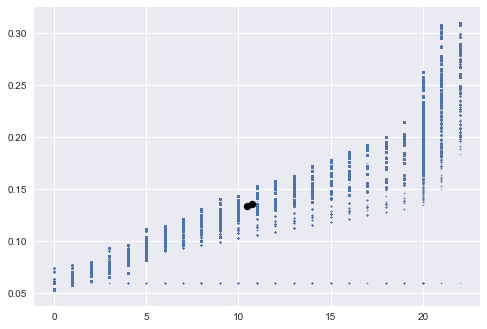

In [42]:
plt.scatter(X_train[col1], X_train[col2], s=2, alpha=.4)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:,col1_ind], 
            scaler.inverse_transform(kmeans.cluster_centers_)[:,col2_ind], s=50, c='k')
plt.show()

### Random Forest (top 10 features only)

In [45]:
param_dict = {'n_estimators':[5, 10, 50, 100, 150, 200], 'max_depth':[5,15,30], 
              'class_weight':[{0:1, 1:5}, {0:1,1:1}, {0:.2, 1:.8}]}
gridsearch2 = GridSearchCV(RandomForestClassifier(n_jobs=8), param_dict, scoring='recall')
gridsearch2.fit(X_train_scaled[important_cols], y_train_arr)
gridsearch2.best_estimator_, gridsearch2.best_score_

(RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 5},
             criterion='gini', max_depth=5, max_features='auto',
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=10, n_jobs=8, oob_score=False, random_state=None,
             verbose=0, warm_start=False), 0.78775466295946905)

In [46]:
y_pred = gridsearch2.predict(X_test_scaled[important_cols])

In [47]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.555343376476
precision: [ 0.49961387  0.7756205 ]
recall: [ 0.89797033  0.28169014]
F1: [ 0.6420199   0.41328374]
support: [ 0.44404029  0.55595971]


array([[ 0.39873501,  0.39935134],
       [ 0.04530529,  0.15660837]])

AdaBoost grid search didn't finish running.

### Logistic Regression ($\tau$)

In [32]:
logit = LogisticRegression(class_weight='balanced', max_iter=1000)
logit.fit(X_train_scaled, y_train_arr)
y_pred = logit.predict(X_test_scaled)

In [8]:
y_probs = logit.predict_proba(X_test_scaled)

In [25]:
y_labels = y_probs[:,1]>.4

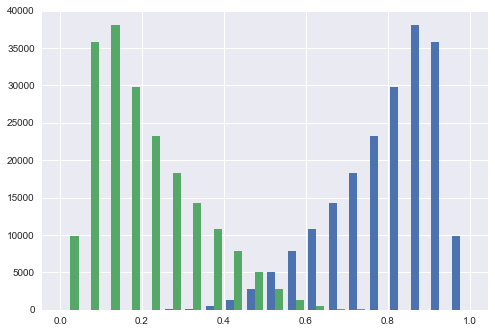

In [19]:
plt.hist(y_probs, bins=20)
plt.show()

In [33]:
print(accuracy_score(y_labels, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_labels, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_labels)/len(y_pred)

0.793408303275
precision: [ 0.94068161  0.21129404]
recall: [ 0.82499861  0.47401212]
F1: [ 0.87905048  0.29229545]
support: [ 0.90999566  0.09000434]


array([[ 0.75074515,  0.04734119],
       [ 0.1592505 ,  0.04266315]])

# PCA

In [55]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

In [56]:
X_train_pca.shape

(593835, 55)

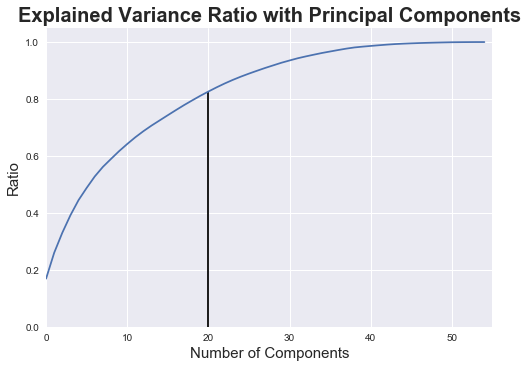

In [58]:
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.ylim(0,1.05)
plt.xlim(0,55)
plt.vlines(ymin=0,ymax=cum_ratio[20],x=20)
plt.xlabel("Number of Components", size=15)
plt.ylabel("Ratio", size=15)
plt.title("Explained Variance Ratio with Principal Components", size=20, weight='bold')
plt.savefig("pca.pdf", dpi=300, bbox_inches='tight')
plt.show()

### Logistic Regression

In [8]:
logit_pca = LogisticRegression(class_weight='balanced', max_iter=1000)
logit_pca.fit(X_train_pca[:,:20], y_train_arr)
y_pred = logit_pca.predict(pca.transform(X_test_scaled)[:,:20])

In [9]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.64458993867
precision: [ 0.6431022   0.65047038]
recall: [ 0.8791167   0.31558631]
F1: [ 0.74281286  0.42498447]
support: [ 0.58382589  0.41617411]


array([[ 0.51325109,  0.28483526],
       [ 0.0705748 ,  0.13133885]])

### Random Forest

In [10]:
RF = RandomForestClassifier()
RF.fit(X_train_pca[:,:20], y_train_arr)
y_pred = RF.predict(pca.transform(X_test_scaled)[:,:20])

In [11]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.788942438847
precision: [ 0.96793857  0.08144015]
recall: [ 0.80639258  0.39122596]
F1: [ 0.87981151  0.1348161 ]
support: [ 0.95796833  0.04203167]


array([[ 0.77249856,  0.02558779],
       [ 0.18546977,  0.01644388]])

### Gradient Boosting Classifier

In [12]:
GB = GradientBoostingClassifier()
GB.fit(X_train_pca[:,:20], y_train_arr)
y_pred = GB.predict(pca.transform(X_test_scaled)[:,:20])

In [13]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.799217968537
precision: [ 0.99272051  0.0343775 ]
recall: [ 0.80250944  0.54437401]
F1: [ 0.8875382  0.064671 ]
support: [ 0.98724905  0.01275095]


array([[ 0.79227668,  0.00580967],
       [ 0.19497237,  0.00694129]])

# Logit Grid Search

### 20 components

In [45]:
param_dict = {'penalty':['l1', 'l2'], 'C':[1e-4, .001, .01, .1, .5, 1, 5], 
              'class_weight':[None, 'balanced'], 'tol':[1e-3, 1e-4, 1e-5]}
logit_grid = GridSearchCV(LogisticRegression(max_iter=1000), param_dict, n_jobs=4)
logit_grid.fit(X_train_pca[:,:20], y_train_arr)
logit_grid.best_estimator_, logit_grid.best_score_

(LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
           penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False), 0.79780073589465084)

In [46]:
y_pred = logit_grid.predict(pca.transform(X_test_scaled)[:,:20])

In [47]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.798995685692
precision: [ 0.98745395  0.05409327]
recall: [ 0.80492461  0.52171815]
F1: [ 0.88689522  0.09802321]
support: [ 0.979065  0.020935]


array([[ 0.78807351,  0.01001283],
       [ 0.19099148,  0.01092217]])

### All Components

In [48]:
param_dict = {'penalty':['l1', 'l2'], 'C':[1e-4, .001, .01, .1, .5, 1, 5], 
              'class_weight':[None, 'balanced'], 'tol':[1e-3, 1e-4, 1e-5]}
logit_grid = GridSearchCV(LogisticRegression(max_iter=1000), param_dict, n_jobs=4)
logit_grid.fit(X_train_scaled, y_train_arr)
logit_grid.best_estimator_, logit_grid.best_score_

(LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False), 0.79931294046325996)

In [50]:
y_pred = logit_grid.predict(X_test_scaled)

In [51]:
print(accuracy_score(y_pred, y_test))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_test)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_test, y_pred)/len(y_pred)

0.800804259748
precision: [ 0.98784641  0.0614992 ]
recall: [ 0.80621797  0.56144358]
F1: [ 0.88783829  0.11085555]
support: [ 0.97788286  0.02211714]


array([[ 0.78838673,  0.00969962],
       [ 0.18949613,  0.01241753]])

In [52]:
total_train_df = pd.concat([X_train_undersampled, pd.DataFrame(data=y_train_undersampled, columns=['loan_status'])],
                          axis=1)

In [56]:
total_train_df['loan_status'].value_counts()

1    120668
0    120668
Name: loan_status, dtype: int64

In [58]:
total_train_df['loan_status'].head(120669)

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
120639    0
120640    0
120641    0
120642    0
120643    0
120644    0
120645    0
120646    0
120647    0
120648    0
120649    0
120650    0
120651    0
120652    0
120653    0
120654    0
120655    0
120656    0
120657    0
120658    0
120659    0
120660    0
120661    0
120662    0
120663    0
120664    0
120665    0
120666    0
120667    0
120668    1
Name: loan_status, Length: 120669, dtype: int64

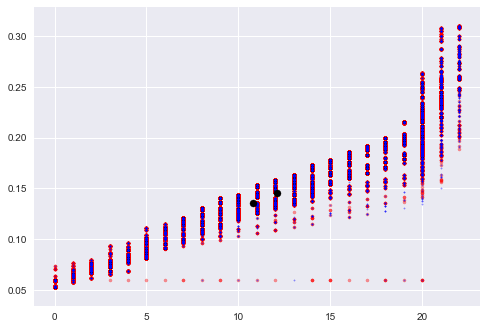

In [61]:
plt.scatter(total_train_df[total_train_df['loan_status']==1][col1], 
            total_train_df[total_train_df['loan_status']==1][col2], 
            s=10, c='r', alpha=.4, label='Paid')
plt.scatter(total_train_df[total_train_df['loan_status']==0][col1], 
            total_train_df[total_train_df['loan_status']==0][col2], 
            s=2, c='b',alpha=.4, label='Charged Off')
plt.scatter(kmeans.cluster_centers_[:,col1_ind], kmeans.cluster_centers_[:,col2_ind], s=50, c='k')
plt.show()

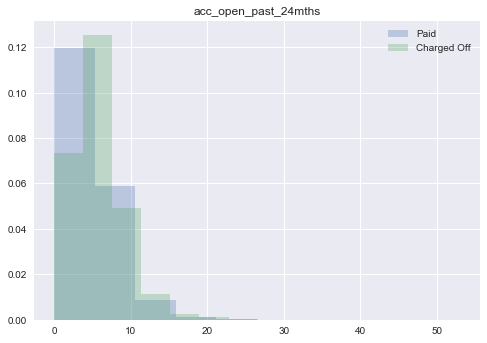

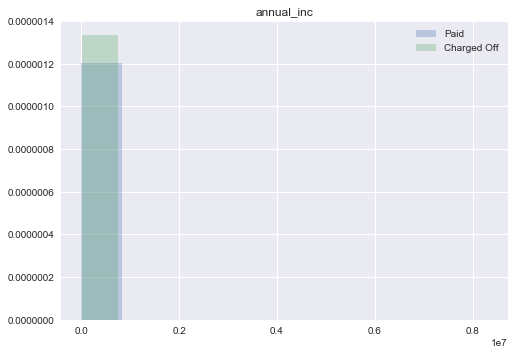

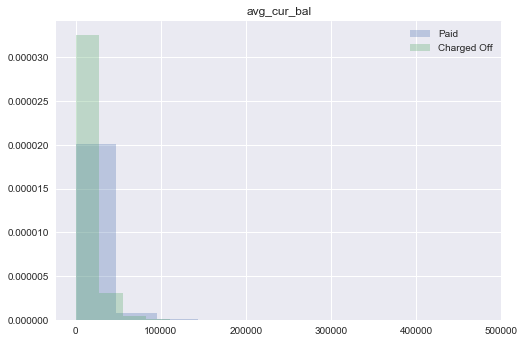

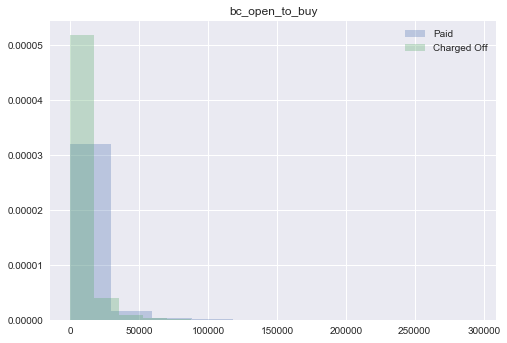

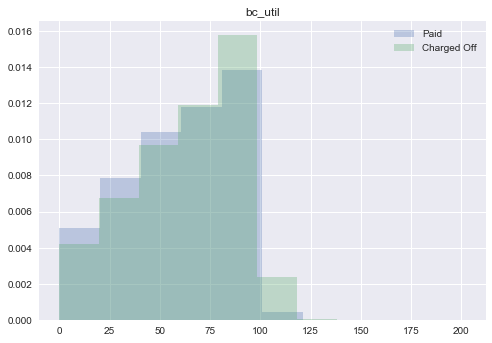

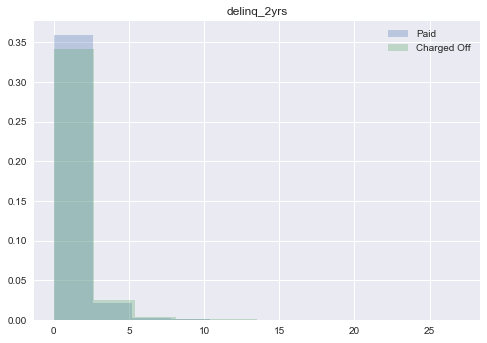

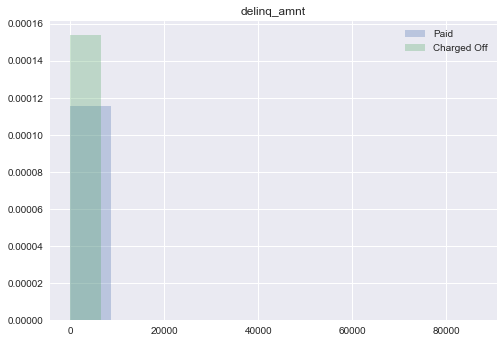

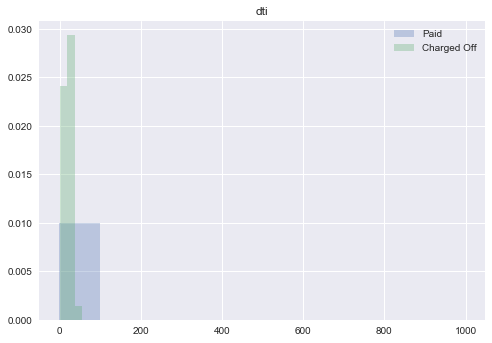

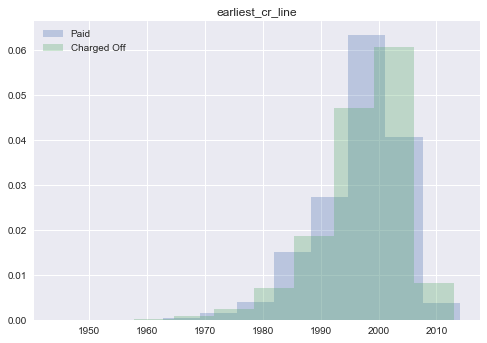

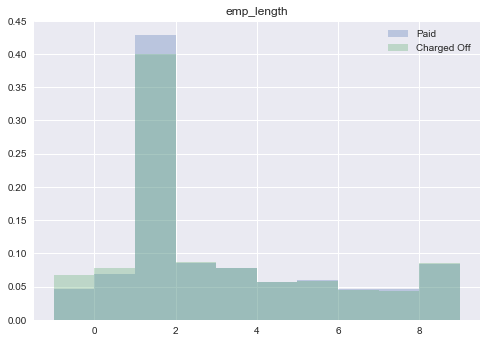

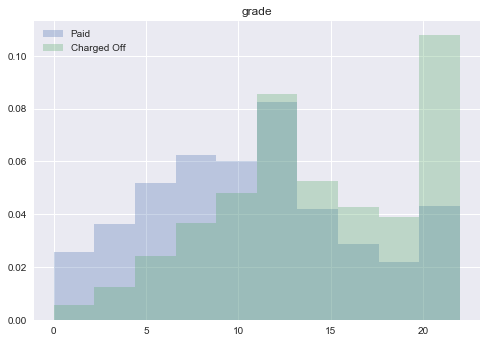

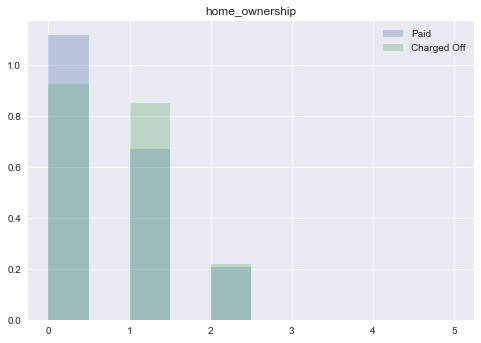

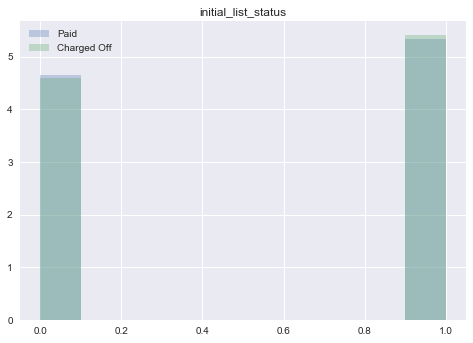

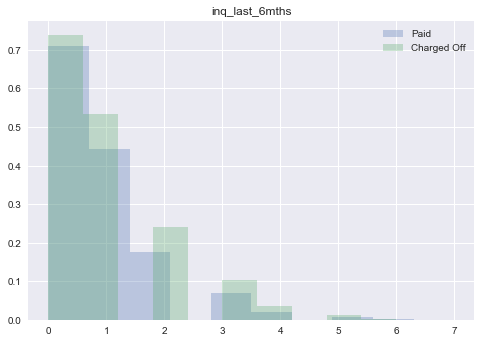

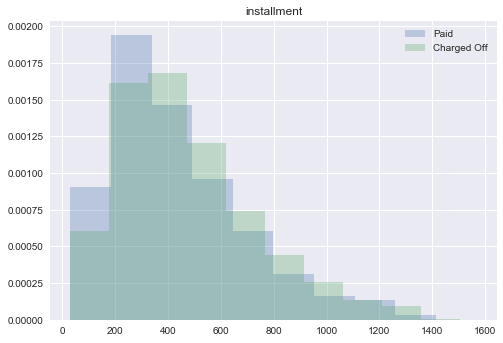

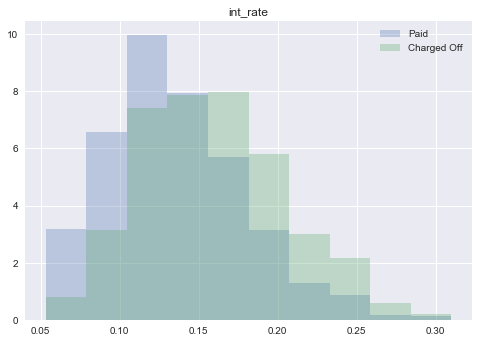

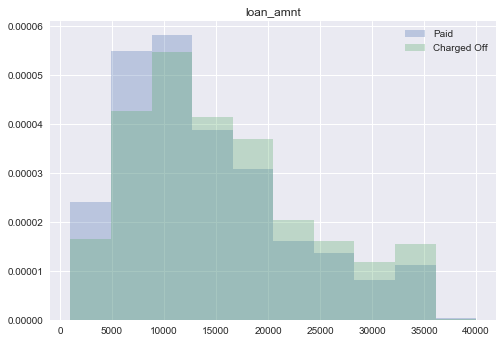

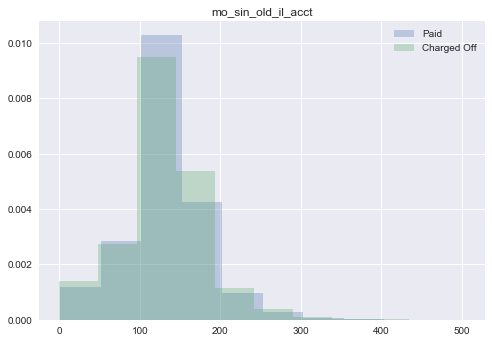

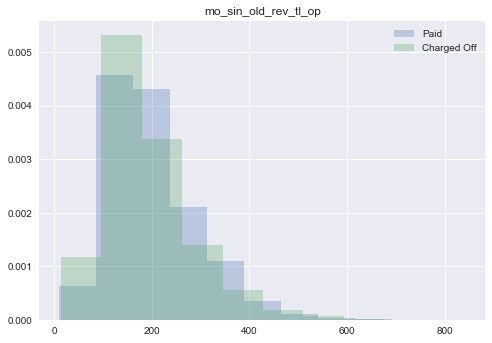

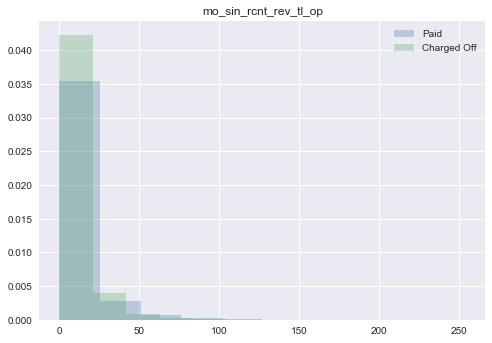

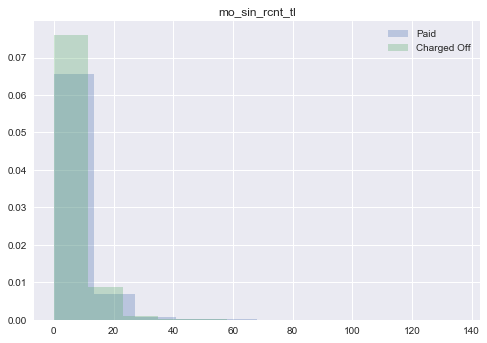

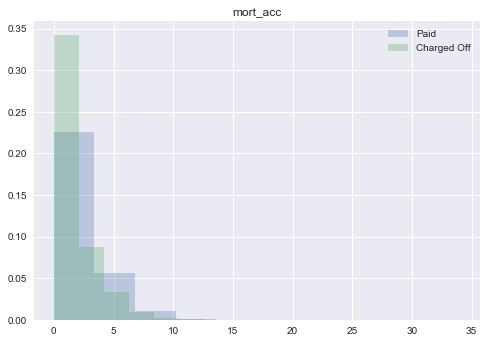

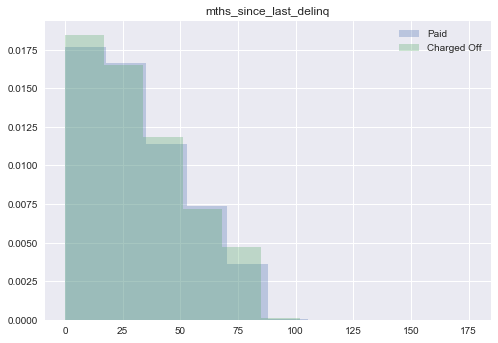

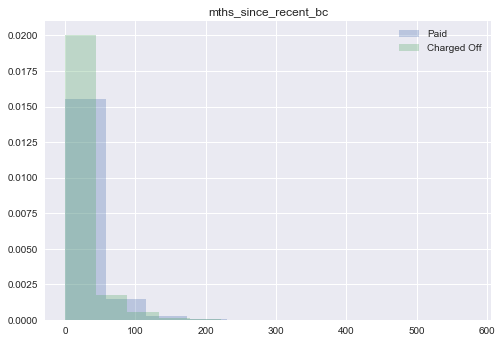

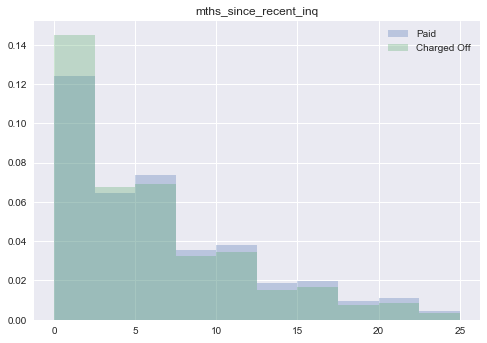

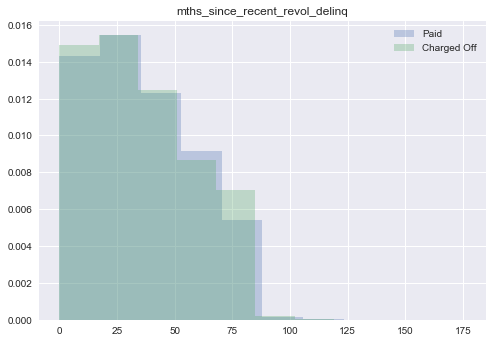

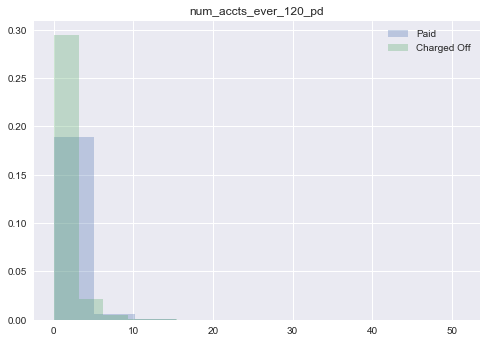

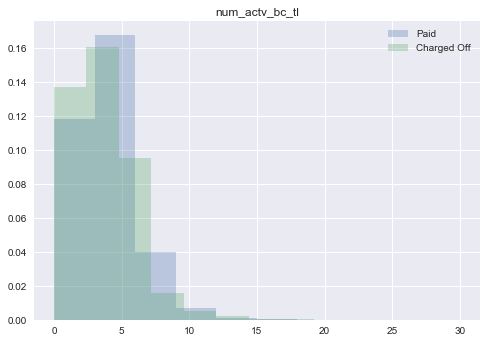

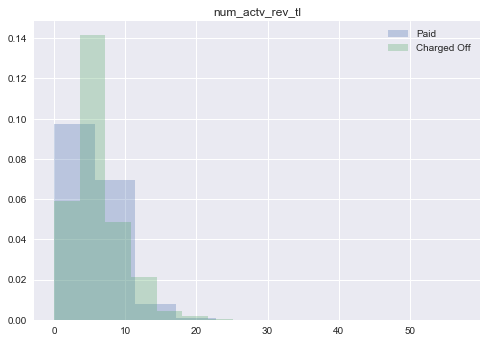

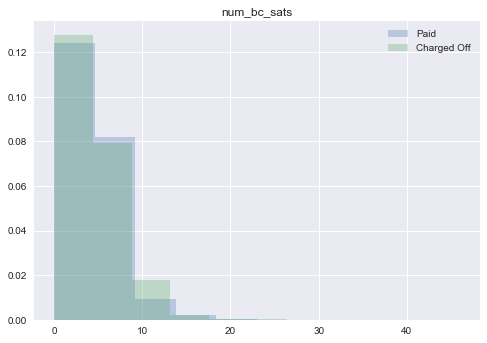

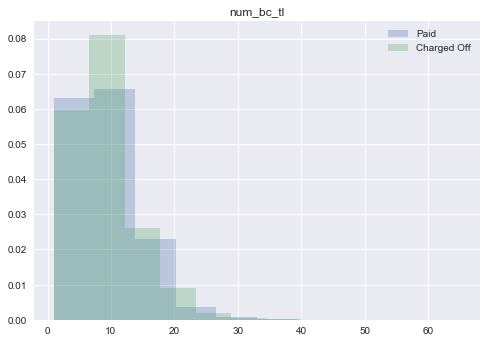

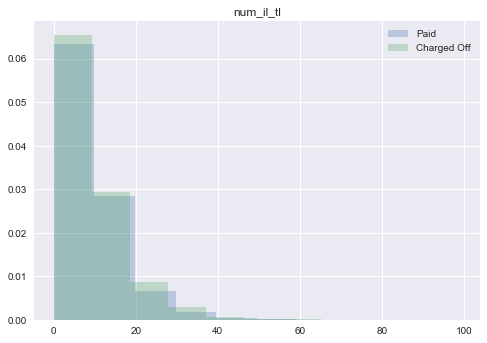

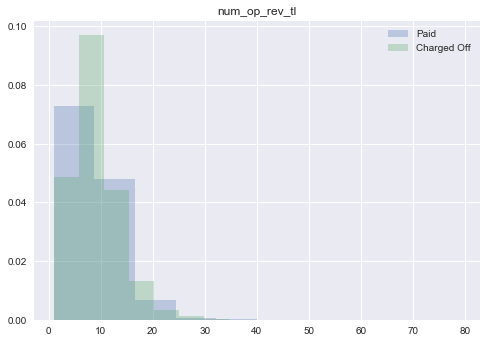

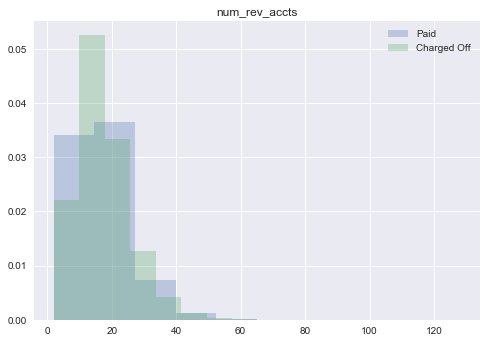

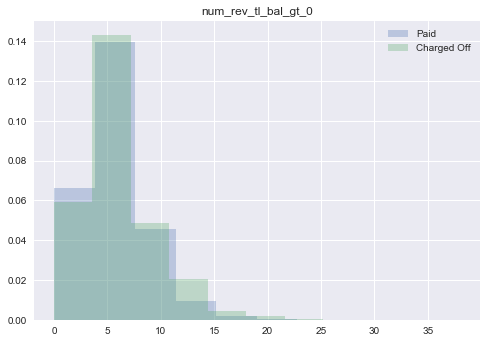

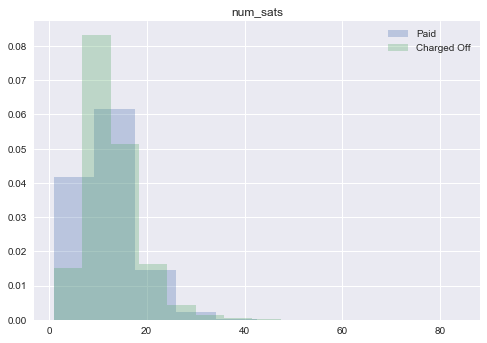

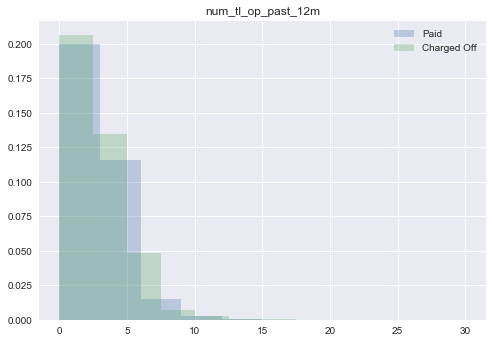

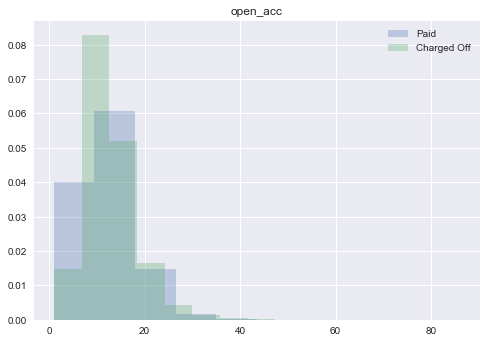

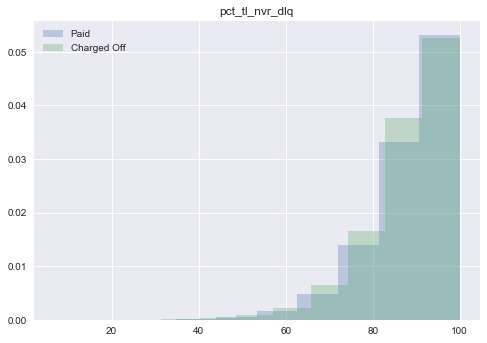

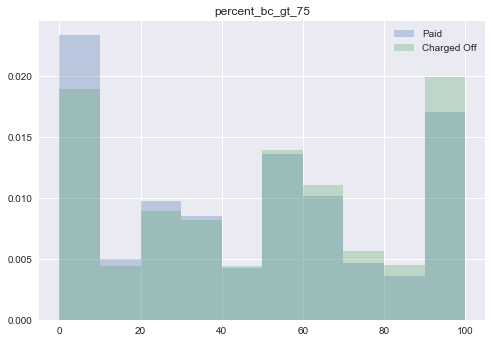

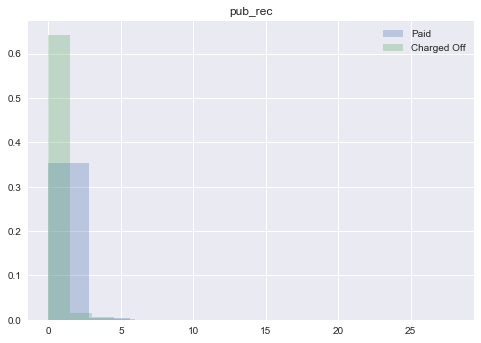

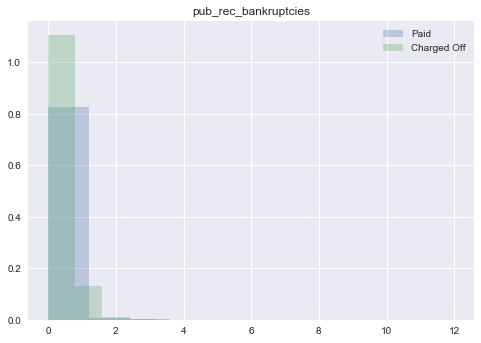

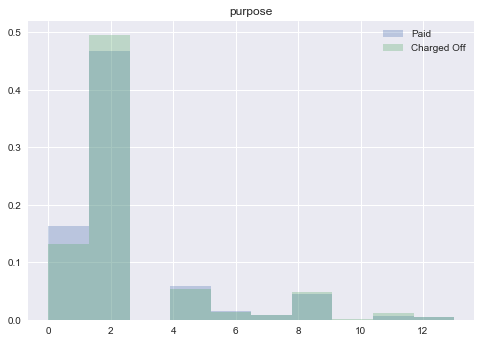

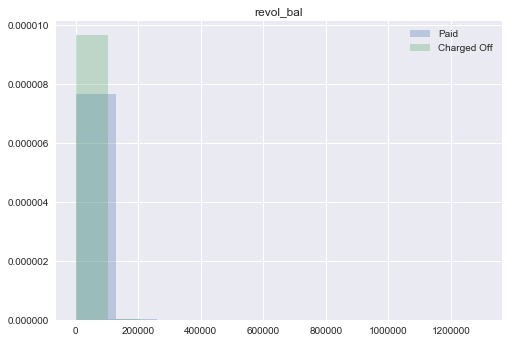

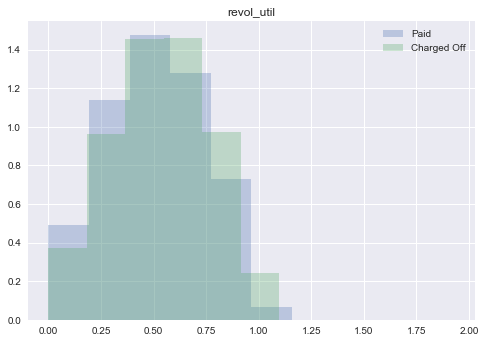

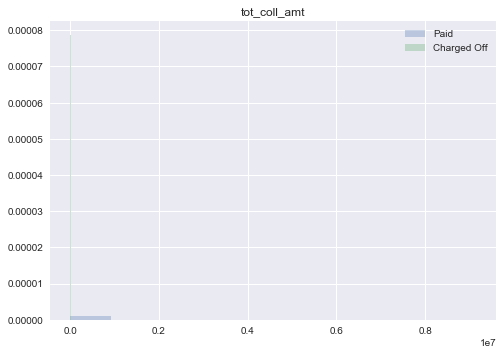

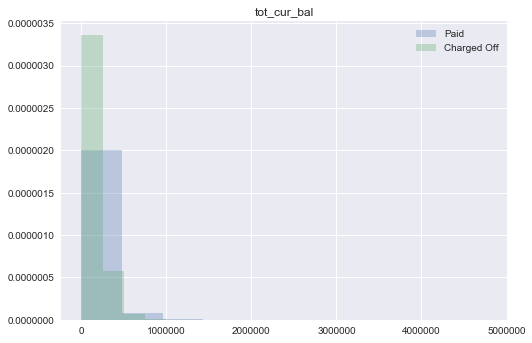

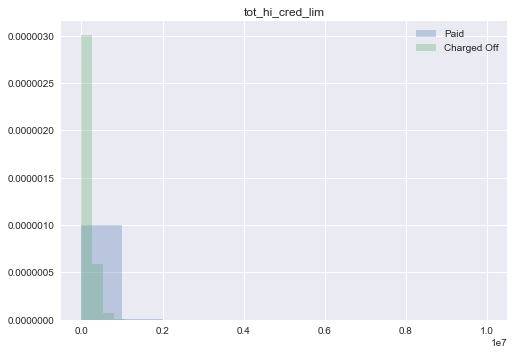

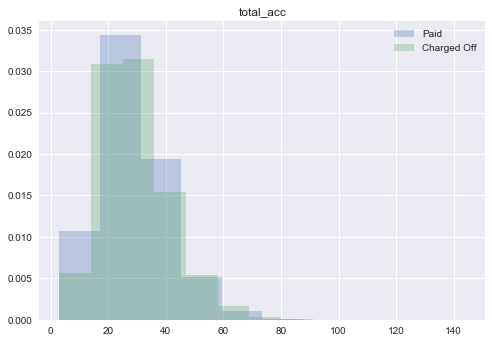

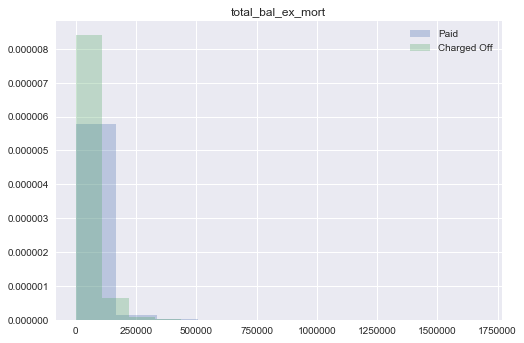

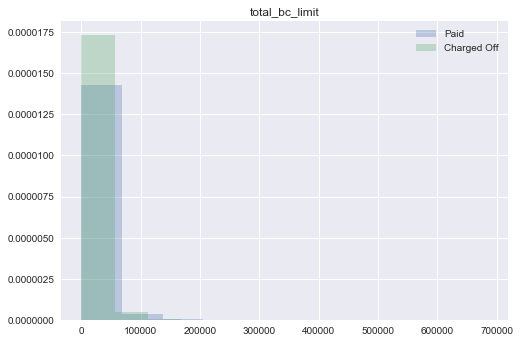

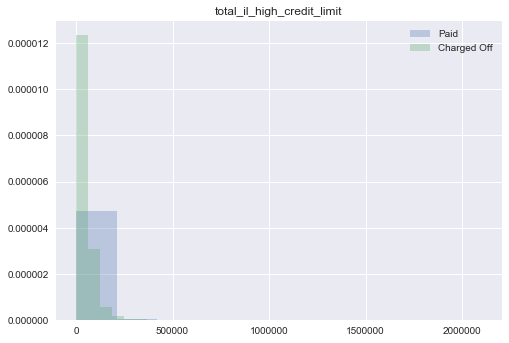

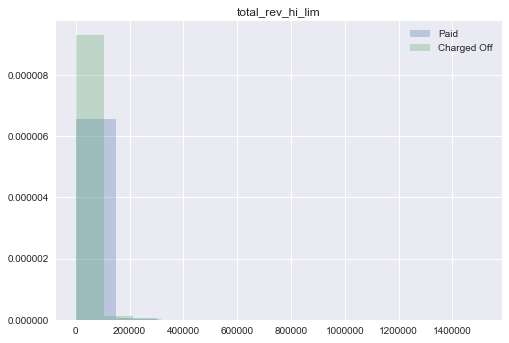

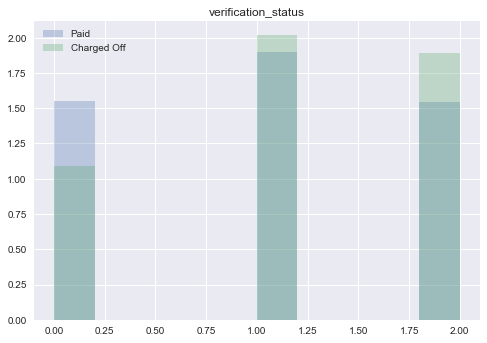

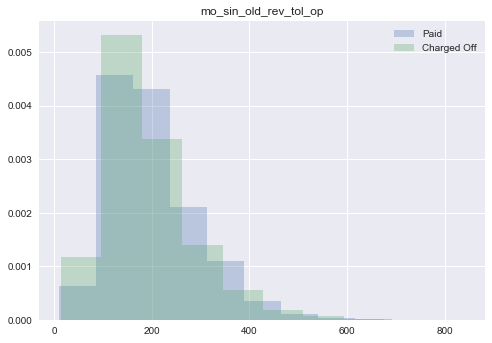

In [108]:
pos, neg = (df_no_null['loan_status']==1).sum(), (df_no_null['loan_status']==0).sum()
for col in df_no_null.columns:
    if col=='loan_status':
        continue
    plt.hist(df_no_null[df_no_null['loan_status']==1][col], normed=True, label='Paid', alpha=.3)
    plt.hist(df_no_null[df_no_null['loan_status']==0][col], normed=True, label='Charged Off', alpha=.3)
    plt.legend()
    plt.title(col)
    plt.show()

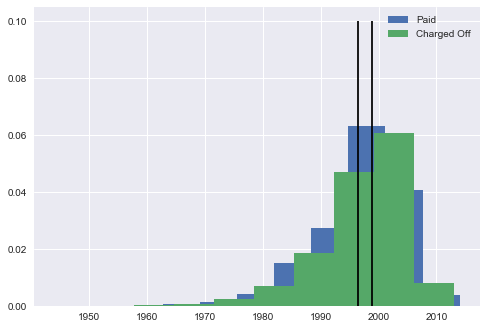

In [114]:
plt.hist(df_no_null[df_no_null['loan_status']==1]['earliest_cr_line'], normed=True, label='Paid')
plt.hist(df_no_null[df_no_null['loan_status']==0]['earliest_cr_line'], normed=True, label='Charged Off')
plt.vlines(kmeans.cluster_centers_[0,8], 0, .1)
plt.vlines(kmeans.cluster_centers_[1,8], 0, .1)
plt.legend()
plt.show()

In [102]:
df_no_null['earliest_cr_line'].value_counts(normalize=True)

2001    0.070520
2000    0.070129
1999    0.065039
2002    0.064767
2003    0.059468
1998    0.056243
2004    0.051989
1997    0.048270
1996    0.047909
1995    0.045872
1994    0.041947
2005    0.040257
1993    0.034121
2006    0.031367
1990    0.024529
1992    0.024115
1991    0.023056
1989    0.022704
2007    0.020302
1988    0.018535
1987    0.017130
1986    0.014798
1985    0.013014
1984    0.012284
2008    0.011328
1983    0.010064
1982    0.007417
2009    0.006087
1981    0.005490
1979    0.004618
          ...   
1975    0.002296
1974    0.001806
1973    0.001593
1972    0.001473
2012    0.001197
1971    0.000961
1970    0.000810
1969    0.000774
1968    0.000681
1967    0.000614
1966    0.000405
1965    0.000383
2013    0.000311
1964    0.000267
1963    0.000174
1960    0.000093
1962    0.000080
1961    0.000076
1958    0.000049
1959    0.000044
2014    0.000036
1957    0.000027
1956    0.000013
1955    0.000013
1953    0.000013
1952    0.000013
1954    0.000009
1951    0.0000

In [101]:
kmeans.cluster_centers_[0,8]

1998.8939389946265

# K Means

In [52]:
kmeans = KMeans(n_clusters=2, n_jobs=4)
kmeans.fit(X_train_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
y_pred = kmeans.labels_
print(accuracy_score(y_pred, y_train_arr))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_train_arr)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_train_arr, y_pred)/len(y_pred)

0.380255458166
precision: [ 0.30219519  0.6857819 ]
recall: [ 0.7901021   0.20069843]
F1: [ 0.43717961  0.31052093]
support: [ 0.30464186  0.69535814]


array([[ 0.24069817,  0.55580085],
       [ 0.06394369,  0.13955728]])

### With specific features

In [128]:
kmeans.fit(X_train_trunc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [129]:
y_pred = kmeans.labels_
print(accuracy_score(y_pred, y_train_undersampled))
pr, re, f1, support = precision_recall_fscore_support(y_pred, y_train_undersampled)
print("precision: {}\nrecall: {}\nF1: {}\nsupport: {}".format(pr, re, f1, support/len(y_pred)))
confusion_matrix(y_train_undersampled, y_pred)/len(y_pred)

0.536956773958
precision: [ 0.81985282  0.25406073]
recall: [ 0.52360261  0.58511308]
F1: [ 0.63906411  0.35428717]
support: [ 0.78289605  0.21710395]


array([[ 0.40992641,  0.09007359],
       [ 0.37296964,  0.12703036]])

In [130]:
kmeans.inertia_

2293219423257769.0

In [131]:
kmeans.cluster_centers_

array([[  1.21123652e+01,   1.45746993e-01,   1.86235755e+01,
          1.06025634e+00,   6.89829319e+03,   7.10552942e+03,
          9.25537088e+04,   1.34473734e+04,   4.97158220e+01,
          4.76498864e+00],
       [  1.07191999e+01,   1.35202429e-01,   1.85947585e+01,
          1.13515626e+00,   1.32011940e+04,   3.04567632e+04,
          3.95334611e+05,   1.92548086e+04,   4.82965469e+01,
          5.34380184e+00]])

In [ ]:
import this